In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ucl_match_data.csv")
df.columns

features = ['GF', 'GA', 'xG', 'xGA', 'Sh', 'SoT', 'Goal Difference', 'xG Difference', 'Shot Accuracy', 'Poss', 'FK', 'PK', 'PKatt']

def aggregate_team_stats(team_id, df):
    # Filter matches for the team
    team_matches = df[(df['Team ID'] == team_id)]

    aggregated_stats = team_matches[features].mean()  # Take the mean of each feature
    return aggregated_stats

In [71]:
team_map = {
    0: 'Liverpool',
    1: 'Barcelona',
    2: 'Arsenal',
    3: 'Internazionale',
    4: 'Atletico Madrid',
    5: 'Bayer Leverkusen',
    6: 'Lille',
    7: 'Aston Villa',
    8: 'Atalanta',
    9: 'Dortmund',
    10: 'Real Madrid',
    11: 'Bayern Munich',
    12: 'Milan',
    13: 'PSV Eindhoven',
    14: 'Paris Saint-Germain',
    15: 'Benfica',
    16: 'Monaco',
    17: 'Brest',
    18: 'Feyenoord',
    19: 'Juventus',
    20: 'Celtic',
    21: 'Manchester City',
    22: 'Sporting CP',
    23: 'Club Brugge',
    24: 'Dinamo Zagreb',
    25: 'Stuttgart',
    26: 'Shakhtar Donetsk',
    27: 'Bologna',
    28: 'Red Star Belgrade',
    29: 'Sturm Graz',
    30: 'Sparta Prague',
    31: 'RB Leipzig',
    32: 'Girona',
    33: 'Red Bull Salzburg',
    34: 'Slovan Bratislava',
    35: 'Young Boys'
}

# Function to map team ID to team name
def get_team_name(team_id):
    return team_map.get(team_id, 'Unknown Team')

def get_team_id(team_name):
    for team_id, name in team_map.items():
        if name == team_name:
            return team_id
    return None

In [72]:
aggregated_data = []
for team_id in df["Team ID"].unique():
    team_name = get_team_name(team_id)
    team_stats = aggregate_team_stats(team_id, df)
    team_stats["Team Name"] = team_name
    aggregated_data.append(team_stats)

team_stats = pd.DataFrame(aggregated_data)

team_stats = team_stats[["Team Name"] + features]

team_stats.head()

,Team Name,GF,GA,xG,xGA,Sh,SoT,Goal Difference,xG Difference,Shot Accuracy,Poss,FK,PK,PKatt
0,Liverpool,2.125,0.625,2.3625,0.8875,15.250,6.750,1.500,1.475,0.450330,54.250,0.375,0.250,0.375
1,Barcelona,3.500,1.625,2.5500,1.3250,15.625,6.500,1.875,1.225,0.403634,61.500,0.625,0.375,0.375
2,Arsenal,2.000,0.375,1.9875,0.7125,12.875,4.875,1.625,1.275,0.423459,53.125,0.250,0.250,0.500
3,Internazionale,1.375,0.125,1.8000,0.9000,12.500,3.375,1.250,0.900,0.229530,51.500,0.375,0.375,0.500
4,Atletico Madrid,2.500,1.500,1.6125,1.3875,12.500,4.750,1.000,0.225,0.399268,48.500,0.250,0.000,0.000


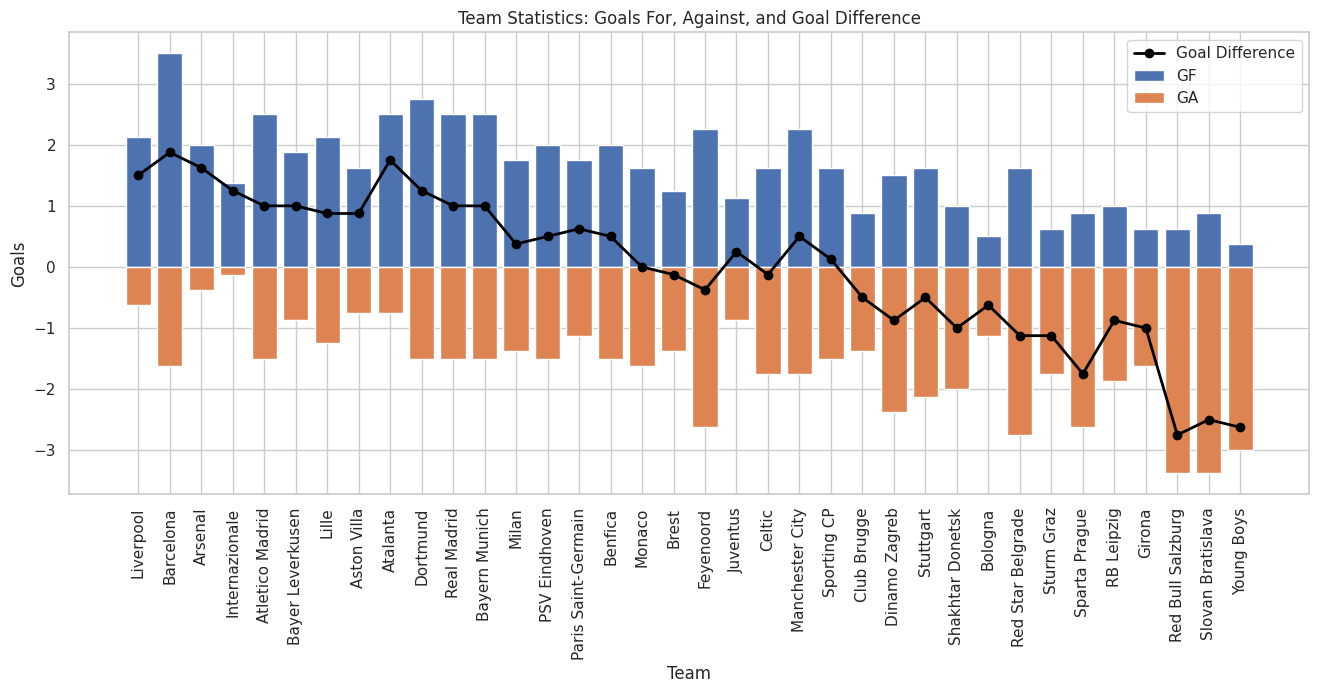

In [73]:
goal_diff_stat = team_stats.sort_values(by="Goal Difference", ascending=False)

# Set the figure size
plt.figure(figsize=(16, 6))

# Plot GF
plt.bar(team_stats['Team Name'], team_stats['GF'], label='GF')

# Plot GA
plt.bar(team_stats['Team Name'], -team_stats['GA'], label='GA')

# Plot Goal Difference (as a line plot)
plt.plot(team_stats['Team Name'], team_stats['Goal Difference'], marker='o', color='black', label='Goal Difference', linewidth=2)

# Customize the plot
plt.xlabel('Team')
plt.ylabel('Goals')
plt.title('Team Statistics: Goals For, Against, and Goal Difference')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend()

plt.show()


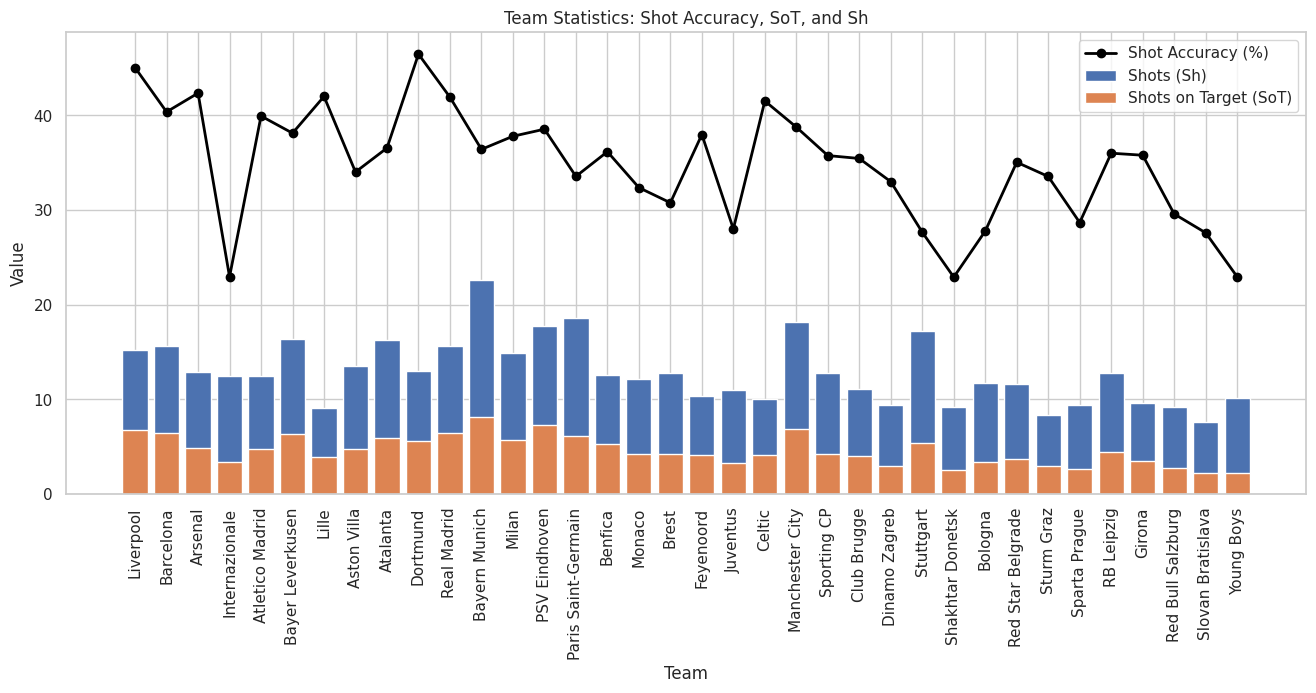

In [74]:
shot_accuracy_stats = team_stats.sort_values(by="Shot Accuracy", ascending=False)

# Set the figure size
plt.figure(figsize=(16, 6))

# Plot Sh
plt.bar(team_stats['Team Name'], team_stats['Sh'], label='Shots (Sh)')

# Plot SoT
plt.bar(team_stats['Team Name'], team_stats['SoT'], label='Shots on Target (SoT)')

# Plot Shot Accuracy
plt.plot(team_stats['Team Name'], team_stats['Shot Accuracy']*100, marker='o', color='black', label='Shot Accuracy (%)', linewidth=2)


# Customize the plot
plt.xlabel('Team')
plt.ylabel('Value')
plt.title('Team Statistics: Shot Accuracy, SoT, and Sh')
plt.xticks(rotation=90)
plt.legend()

plt.show()


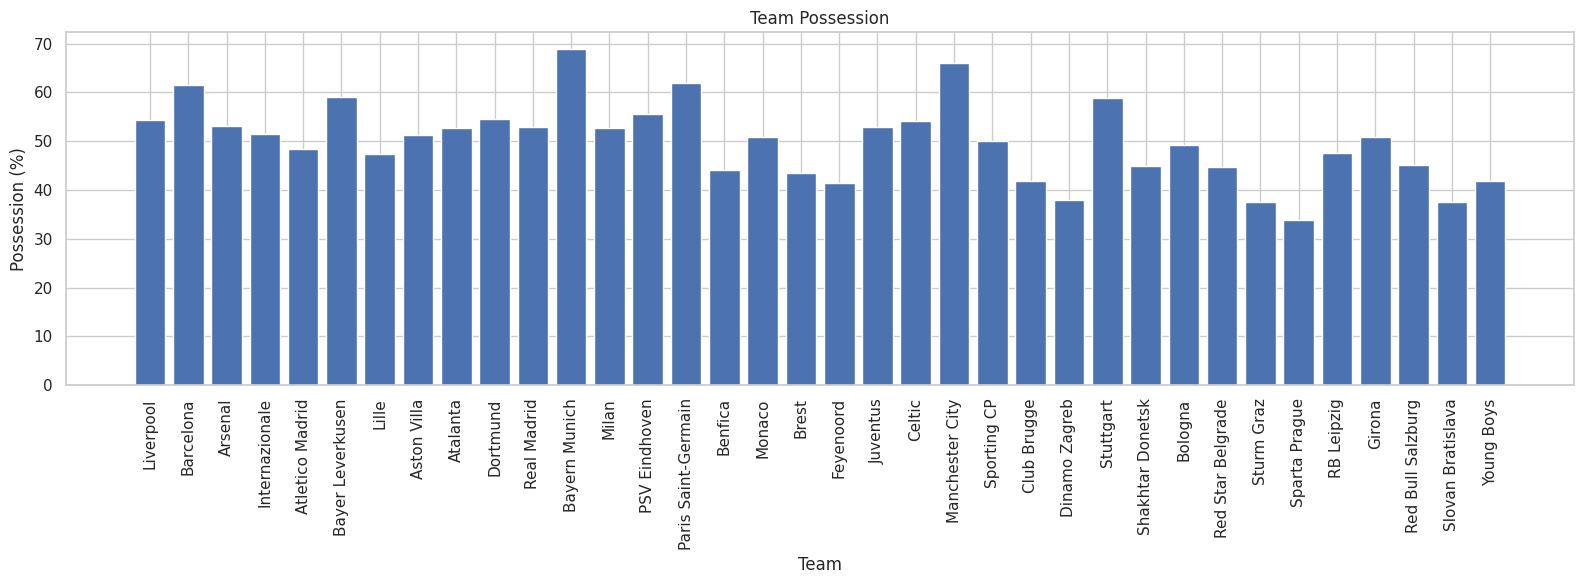

In [75]:
# Create the bar plot
plt.figure(figsize=(16, 6))
plt.bar(team_stats['Team Name'], team_stats['Poss'])

# Customize the plot
plt.xlabel('Team')
plt.ylabel('Possession (%)')
plt.title('Team Possession')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


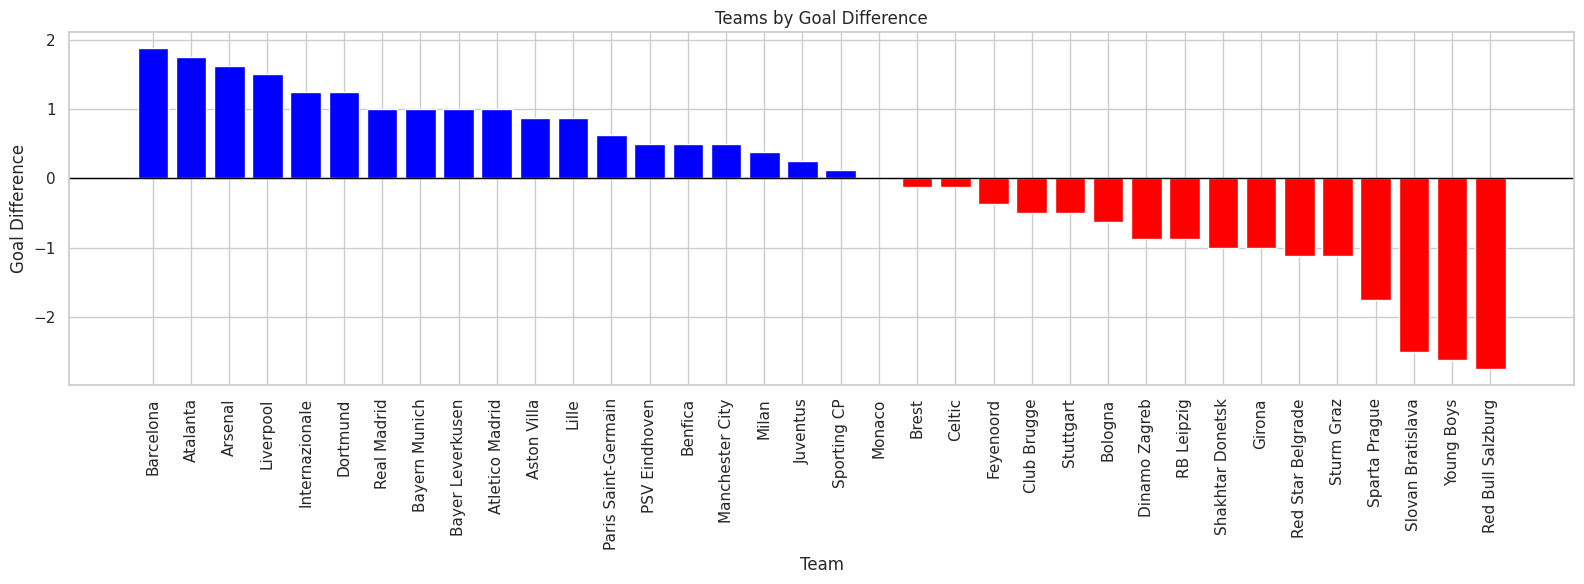

In [76]:
# Sort the DataFrame by 'Goal Difference'
goal_diff_stat = team_stats.sort_values(by="Goal Difference", ascending=False)

colors = ['blue' if gd >= 0 else 'red' for gd in goal_diff_stat['Goal Difference']]

# Create the bar plot
plt.figure(figsize=(16, 6))
plt.bar(goal_diff_stat['Team Name'], goal_diff_stat['Goal Difference'], color=colors)

# Customize the plot
plt.xlabel('Team')
plt.ylabel('Goal Difference')
plt.title('Teams by Goal Difference')
plt.xticks(rotation=90)
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()
